In [35]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import f90nml
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.feature import ShapelyFeature
from cartopy.io.shapereader import Reader



In [2]:
#Read in namelist, switching this to command line likely
file = '/home/bromlgab/code/model_config/wps/20km.cheyenne.namelist.wps'
namelist_wps = f90nml.read(file)
#read in variable for grid
geogrid = namelist_wps['geogrid']
geogrid = geogrid.todict()


In [3]:
ref_lon = int(geogrid['ref_lon'])
ref_lat = int(geogrid['ref_lat'])

In [4]:
geogrid

OrderedDict([('parent_id', 1),
             ('parent_grid_ratio', 1),
             ('i_parent_start', 1),
             ('j_parent_start', 1),
             ('e_we', 290),
             ('e_sn', 200),
             ('geog_data_res', 'modis_15s+modis_lai+default'),
             ('dx', 20000),
             ('dy', 20000),
             ('map_proj', 'lambert'),
             ('ref_lat', 49.0),
             ('ref_lon', -104.0),
             ('truelat1', 55.0),
             ('truelat2', 40.0),
             ('stand_lon', -104.0),
             ('geog_data_path', '/glade/work/wrfhelp/WPS_GEOG/')])

In [5]:
if geogrid['map_proj']=='lambert':
    projection = cartopy.crs.LambertConformal(
     central_longitude = ref_lon,
     central_latitude = ref_lat,
     standard_parallels = (int(geogrid['truelat2']),int(geogrid['truelat1']))
    )

In [17]:
dx = int(geogrid['dx'])
e_we = int(geogrid['e_we'])
e_sn = int(geogrid['e_sn'])
(e_sn*dx)


4000000

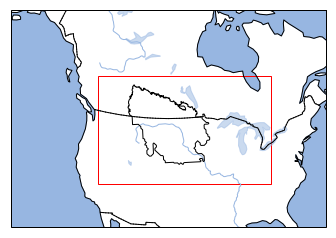

In [44]:
ax = plt.axes(projection = projection)
ax.set_extent([(-dx*e_we)/2,(dx*e_we)/2,(-dx*e_sn)/2,(dx*e_sn)/2], crs=projection)
#ax.add_patch(mpatches.Rectangle(xy=[1,1],width = e_we*100,height = e_sn*100,facecolor='red', alpha=0.2,transform=projection))
#ax.coastlines()
#ax.add_feature(cfeature.NaturalEarthFeature)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAKES, alpha=0.5)
ax.add_feature(cfeature.RIVERS)
ax.add_feature(cartopy.feature.BORDERS)
ax.add_patch(mpatches.Rectangle(xy=[-1300000, -1200000], width=4000*796, height=4000*496,edgecolor='red',fill=False,transform=projection))
#ax.add_patch(mpatches.Rectangle(xy=[-290*20000,-200*20000], width = 290*20000, height = 200*20000, fill=False, edgecolor='black', transform=projection))
shape_feature = ShapelyFeature(Reader('NGP_Study_Area/Study_Area_08_01_17.shp').geometries(),crs=ccrs.PlateCarree(), facecolor='none',edgecolor='black')
ax.add_feature(shape_feature)
plt.show()

In [28]:
(200-140)*20000

1200000

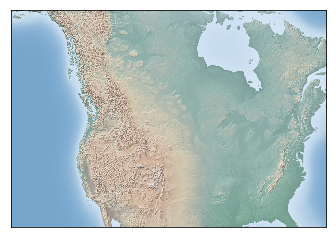

In [11]:
from mpl_toolkits.basemap import Basemap
m = Basemap(width=290*20000,height=200*20000,projection='lcc',
            resolution='c',lat_1=40.,lat_2=55,lat_0=49,lon_0=-104.)
m.shadedrelief()

plt.show()

In [ ]:
65,60 #corner start of 